In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve,auc


# OBJECTIVE
Our goal is to predict the quality of wine based on the given features.
The target/output variable is categorical as it has quality ratings from 1-10.
Since our output variable can be classified it is plausible to use a classification algorithm/model.

In [ ]:
## DESCRIPTION OF THE PREDICTOR FEATURES(Domain Knowledge)

# Fixed Acidity: are non-volatile acids that do not evaporate readily

# Volatile Acidity: Amount of acetic acid in wine which leads to an unpleasant vinegar taste

# Citric Acid: acts as a preservative to increase acidity. When in small quantities,
# adds freshness and flavor to wines

# Residual Sugar: is the amount of sugar remaining after fermentation stops. The 
                # key is to have a perfect balance between sweetness and sourness. 
                # It is important to note that wines > 45g/ltrs are sweet.

# Chlorides: the amount of salt in the wine

# Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

# Total Sulfur Dioxide: is the amount of free + bound forms of SO2

# Density:  the density of wine is close to that of water depending on the percent alcohol and sugar content.

# pH: describes the level of acidity on a scale of 0–14. Most wines are always 
    # between 3–4 on the pH scale.

# Alcohol: Percentage of alcohol in the wines.

# Sulphates: a wine additive that contributes to SO2 levels and acts as an 
           # antimicrobial and antioxidant.

## WORKFLOW
1)EDA-UNIVARIATE,BIVARIATE& MULTIVARIATE ANALYSIS OF FEATURES.
  MENTION OBSERVATIONS AFTER CREATING EACH PLOT.
    


In [5]:
## Loading the dataset
wine=pd.read_csv("QualityPrediction.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Obtaining top 5 records
wine.head()
# In our dataset we have '11' independent(predictor) variables.
# 'quality' is our target(response)  variable.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking total number of 'records' and 'columns' in our dataset
wine.shape
# Dataset has 1599 records and 12 columns

(1599, 12)

In [7]:
# Checking for null values in any of the features
wine.isnull().sum()
# The output shows that there no missing values in our dataset. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Checking the data types of the values in each of the columns.
wine.info()
# No null values
# All predictor variables have 'float' data.
# The target variable is in integer format.It has discrete 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Univariate Analysis for each Feature in the Dataset.


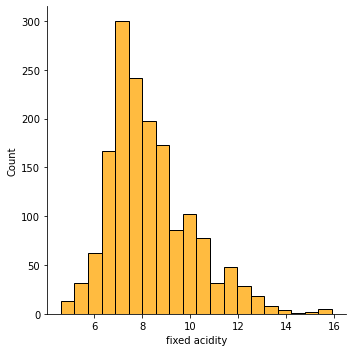

In [16]:
# Plotting Histogram for 'fixed acidity'
sns.displot(wine,x=wine['fixed acidity'],bins=20,color='orange')

# OBSERVATIONS
# The histogram for fixed acidity is 'right skewed'.  

In [17]:
wine['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

<AxesSubplot:xlabel='fixed acidity'>

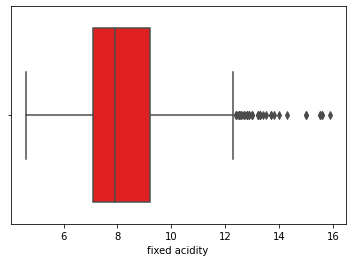

In [23]:
sns.boxplot(x=wine['fixed acidity'],data=wine,color='red')

#Boxplot shows that between Q1 and median values are highly concentrated.
#Between median and Q3 values are concentrated but not as much as between Q1 and Q2.
#Whereas the values in the left and right whisker are pretty spread out.
#One major thing to notice is the large number of outliers present for fixed acidity.

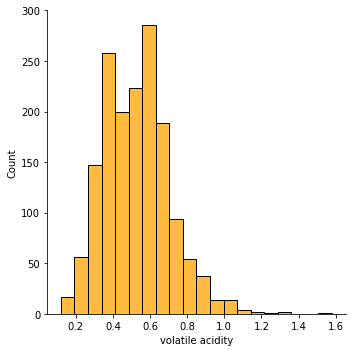

In [24]:
# Plotting Histogram for 'volatile acidity'
sns.displot(wine,x=wine['volatile acidity'],bins=20,color='orange')

# OBSERVATIONS
# The distribution of volatile acidity is bi-modal(2 peaks).The peaks are around
# 0.4 and 0.6.

<AxesSubplot:xlabel='volatile acidity'>

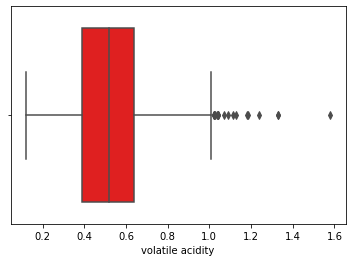

In [25]:
sns.boxplot(x=wine['volatile acidity'],data=wine,color='red')

# The boxplot shows that values between Q1 -median and median-Q3 are almost equally distributed.
# The right whisker however has a greater spread of values compared to left whisker.
# This also has many outliers.

In [27]:
wine['volatile acidity'].describe()

# Here,we observe that in the bimodal distribution the mean is equal to the mode.
# Which means that the distribution is almost 'symmetric'.

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

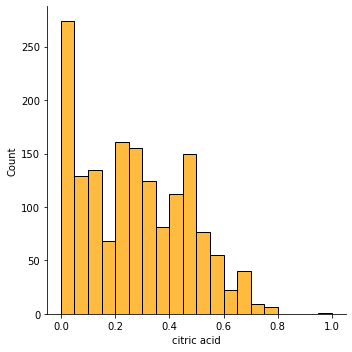

In [28]:
# Plotting Histogram for 'citric acid'
sns.displot(wine,x=wine['citric acid'],bins=20,color='orange')

# OBSERVATIONS
# The distribution for citric acid is right skewed.

In [29]:
wine['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

<AxesSubplot:xlabel='citric acid'>

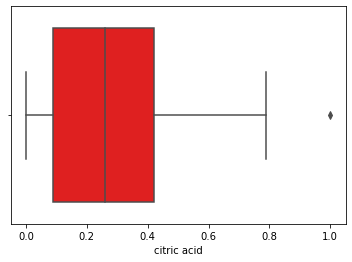

In [30]:
sns.boxplot(x=wine['citric acid'],data=wine,color='red')

#As we noted earlier,the distribution is right skewed.
#There is high concentration of values between min(0) and Q1.
#The distribution of values between Q1-median and median-Q3 is symmetrical.
#The values in the right whisker are well spaced/spread. 

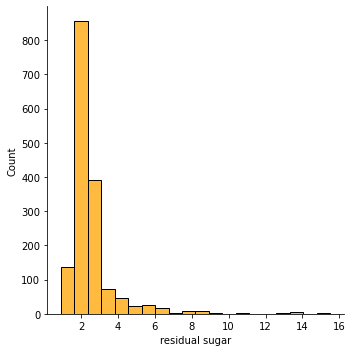

In [31]:
# Plotting Histogram for 'residual sugar'
sns.displot(wine,x=wine['residual sugar'],bins=20,color='orange')

# OBSERVATIONS
# The distribution for citric acid is extremely right skewed.
# It has a huge peak between 1.9 & 2.2.

<AxesSubplot:xlabel='residual sugar'>

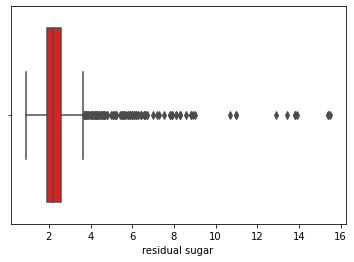

In [34]:
sns.boxplot(x=wine['residual sugar'],data=wine,color='red')

# Values are highly concentrated between Q1 and median.
# It is also clearly evident that there a huge number of outliers.

In [35]:
wine['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

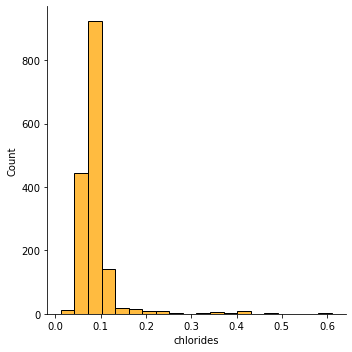

In [37]:
# Plotting Histogram for 'Chlorides'
sns.displot(wine,x=wine['chlorides'],bins=20,color='orange')

# OBSERVATIONS
# We see a huge peak between 0.07 & 0.1.
# The distribution is highly right skewed.

In [38]:
wine['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

<AxesSubplot:xlabel='chlorides'>

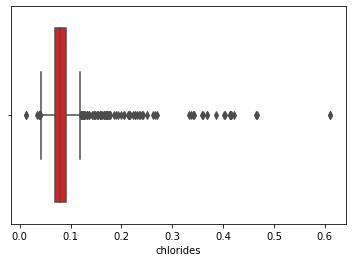

In [39]:
sns.boxplot(x=wine['chlorides'],data=wine,color='red')

# The boxplot shows that there are a lot of outliers on the higher end.
# There are also a few outliers on the lower end.

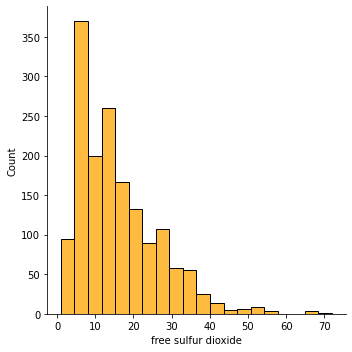

In [40]:
# Plotting Histogram for 'free sulfur dioxide'
sns.displot(wine,x=wine['free sulfur dioxide'],bins=20,color='orange')

# OBSERVATIONS
# Again the distribution is right skewed.
# The peak is around '7'.

In [41]:
wine['free sulfur dioxide'].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

<AxesSubplot:xlabel='free sulfur dioxide'>

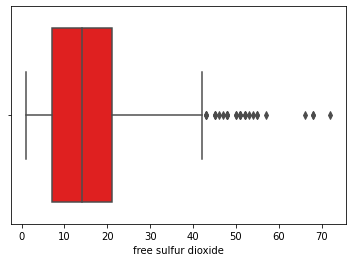

In [42]:
sns.boxplot(x=wine['free sulfur dioxide'],data=wine,color='red')

# The values are symmetrically distributed between Q1 & Q3,that is the number
# of values between Q1 & median and median & Q3 are almost equal.
# We see many outliers on the higher end of the distribution.

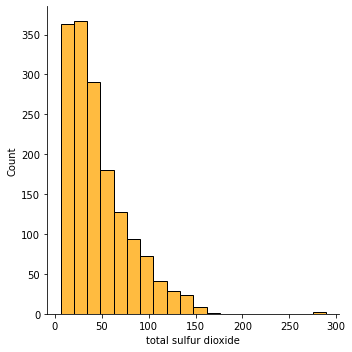

In [43]:
# Plotting Histogram for 'total sulfur dioxide'
sns.displot(wine,x=wine['total sulfur dioxide'],bins=20,color='orange')

# The distribution is bi-modal and right skewed.

<AxesSubplot:xlabel='total sulfur dioxide'>

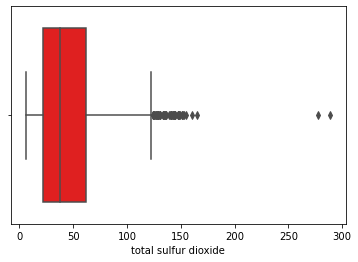

In [44]:
sns.boxplot(x=wine['total sulfur dioxide'],data=wine,color='red')

# The distribution is also bi-modal and right skewed.

In [45]:
wine['total sulfur dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

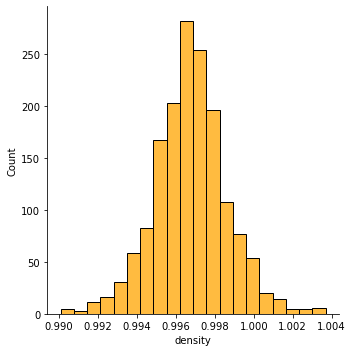

In [46]:
# Plotting Histogram for 'density'
sns.displot(wine,x=wine['density'],bins=20,color='orange')

# This is a very different output than all the previous ones.The data is normally
# distributed.We can say that it is symmetric in nature.

<AxesSubplot:xlabel='density'>

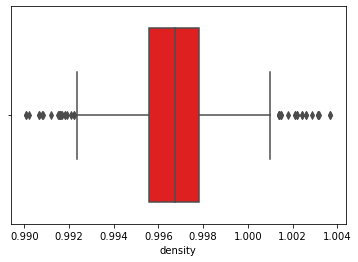

In [47]:
sns.boxplot(x=wine['density'],data=wine,color='red')

# We see a symmetric boxplot with outliers on both ends of the distribution.
# Here the mean is equal to the median.
# Most of the values are between  '0.99' & '1'.

In [48]:
wine['density'].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

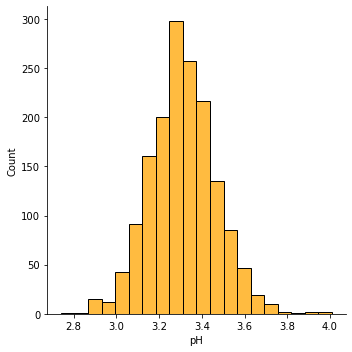

In [49]:
# Plotting Histogram for 'pH'
sns.displot(wine,x=wine['pH'],bins=20,color='orange')

# The distribution for 'pH' is similar to 'density' in the sense that it is also
# normally distributed.

<AxesSubplot:xlabel='pH'>

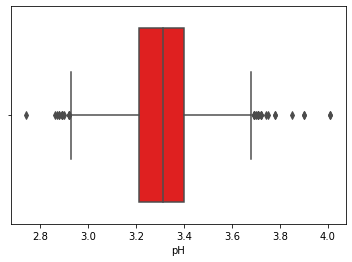

In [50]:
sns.boxplot(x=wine['pH'],data=wine,color='red')

# The boxplot is symmetrical with outliers on both ends.
# The mean is also equal to the median.

In [51]:
wine['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

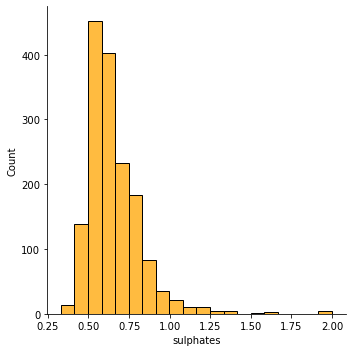

In [52]:
# Plotting Histogram for 'sulphates'
sns.displot(wine,x=wine['sulphates'],bins=20,color='orange')

# The distribution is right skewed.

<AxesSubplot:xlabel='sulphates'>

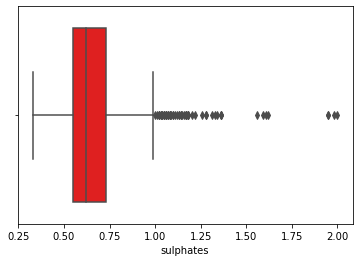

In [54]:
sns.boxplot(x=wine['sulphates'],data=wine,color='red')

# The distribution shows that there are outliers on the higher end.

In [56]:
wine['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

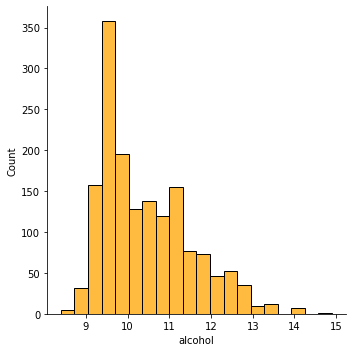

In [57]:
# Plotting Histogram for 'alcohol'
sns.displot(wine,x=wine['alcohol'],bins=20,color='orange')

# The distribution is right skewed but definitely not as much as the previous features.
# We have a single mode(peak) here around '9.5'.

<AxesSubplot:xlabel='alcohol'>

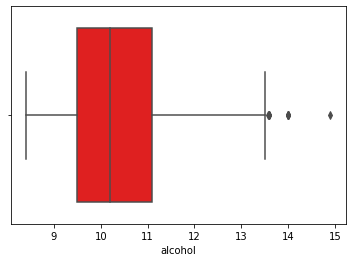

In [58]:
sns.boxplot(x=wine['alcohol'],data=wine,color='red')

# The right whisker has a greater spread of values compared to the left whisker.
# There are a small number of oultiers on the higher end. 
# The minimum alcohol percentage is '8.4' and max is '14.9'%.The mean % is around '10'.

In [59]:
wine['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [7]:
# Finding out the number of values in each category/class of quality.
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

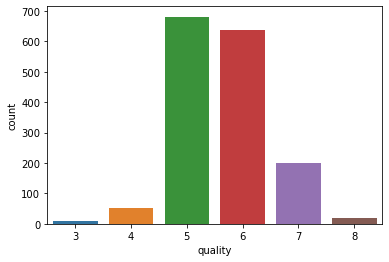

In [7]:
# Plotting chart for quality count
sns.countplot(x=wine['quality'],data=wine)

# The graph shows that majority of the wines have quality values '5' & '6'.
# Very few wines that are in categories '3','4' & '8'.

# Summarizing Observations Made Through Univariate Analysis :-


'pH' and 'density' have normal distributions.'volatile acidity' has a bi-modal
distribution.

Besides the aforementioned the remaining features are right skewed in nature.

All the features have outliers present.

Most of the outliers are present on the higher end of the distributions.

'pH','density' and 'chlorides' have outliers on both ends.

Residual sugar and chlorides have some extreme outliers.

Most of the wines fall in the '5'(681)&'6'(638) category with some in the '7'(199) category.
Very few wines fall in categories '3','4' & '8'.


# Bi-Variate Analysis

Here,we will check how the independent(predictor) variables affect the target variable.

We will then find the most strongly correlated and weakly correlated features.

In [7]:
# Using DataFrame.corr() method to get column wise correlation.
wine.corr() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

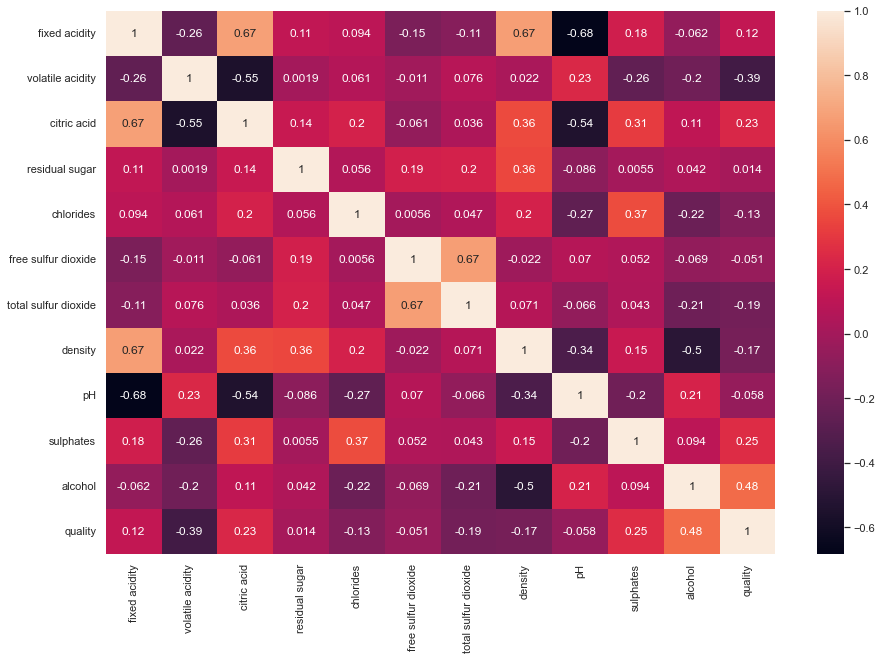

In [4]:
# Plotting heatmap using above correlation DataFrame to see which variables affect
# output variable('quality') the most and least.
# Here,we have used sns.set() method to increase size of heatmap.
# Without the above method the heatmap looks very untidy and unreadable.

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(wine.corr(),annot=True)

# OBSERVATIONS BASED ON HEATMAP
# Out of all the features 'alcohol' has a moderately positive relation with 'quality'.
# Fixed acidity has a positive negligible correlation with 'quality'.
# Volatile acidity has a negative weak correlation with 'quality'.
# citric acid has a positve negligible correlation with 'quality'.
# residual sugar has almost no correlation with 'quality'.
# chlorides has a negative negligible correlation with 'quality'.
# free sulfur dioxide also has almost no correlation with 'quality'.
# total sulfur dioxide has a negative negligible correlation with 'quality'.
# density has a negative negligible correlation with 'quality'.
# pH also has almost no correlation with 'quality'.
# sulphates has a positive negligible correlation with 'quality'.

# SUMMARISING ABOVE OBSERVATIONS

# IT IS INTERESTING TO NOTE THAT NONE OF THE INDEPENDENT FEATURES HAVE A 'STRONG CORRELATION'
# WITH 'QUALITY'.

# Features that have higher correlation with quality than other features are :-
# (Alcohol,Volatile Acidity ,Sulphates & Citric Acid).

## Boxplots To Plot and Check Relation Between Independent Variables and 'quality' 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

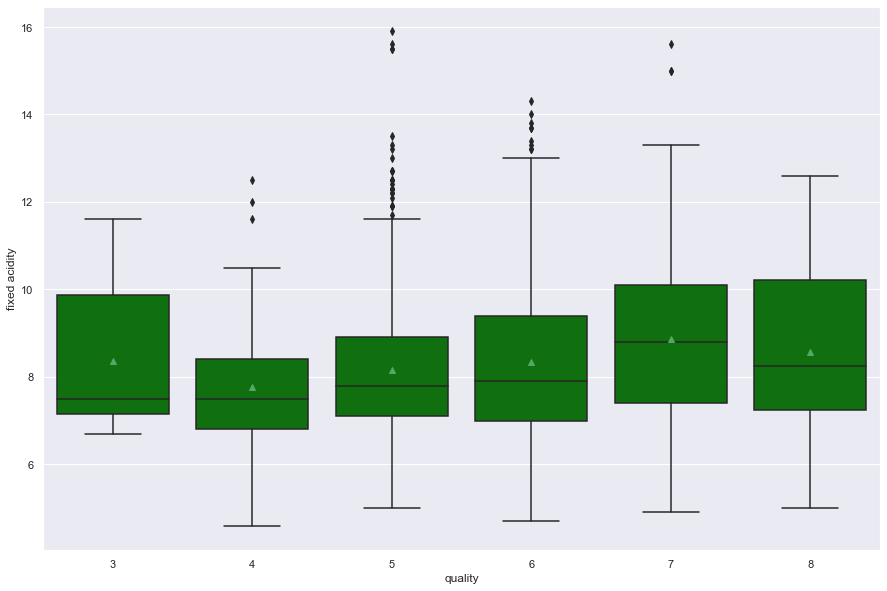

In [11]:
# Fixed Acidity vs quality
sns.boxplot(x=wine['quality'],y=wine['fixed acidity'],data=wine,showmeans=True,color='green')

# As we know the line in the box represents the median.The median is almost similar
# for all the classes of 'quality'.
# There doesn't seem to be any relation between fixed acidity and quality.
# The dot on every box represents the mean for that class of quality.The mean
# is also more or less similar.
# Can't seem to find any evident pattern or trend in their relation.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

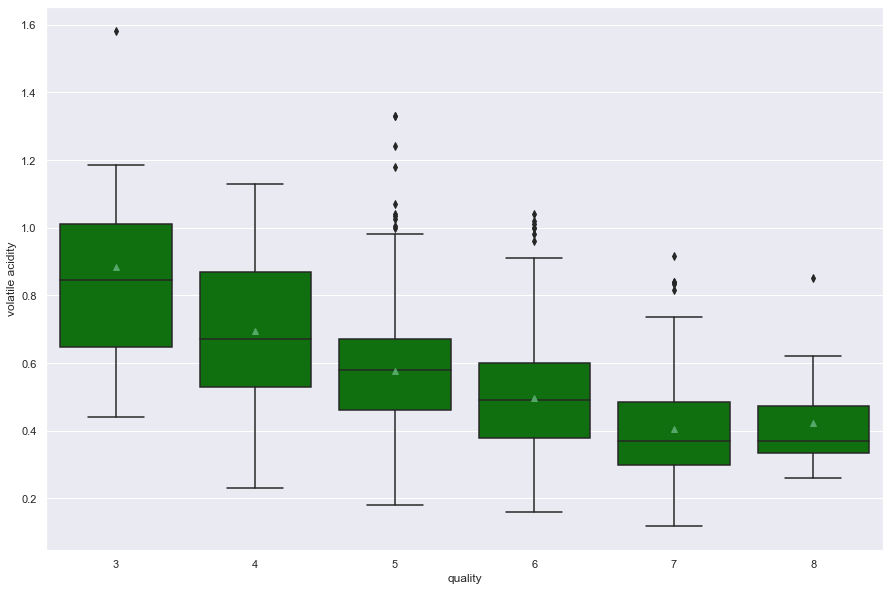

In [12]:
# Volatile Acidity vs quality
sns.boxplot(x=wine['quality'],y=wine['volatile acidity'],data=wine,color='green',showmeans='True')

# From the heatmap we know that volatile acidity has avlue of '-0.39' with quality.
# A negative correlation which means that as volatile acidity increases the quality
# of wine decreases.This is evident from the below boxplot.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

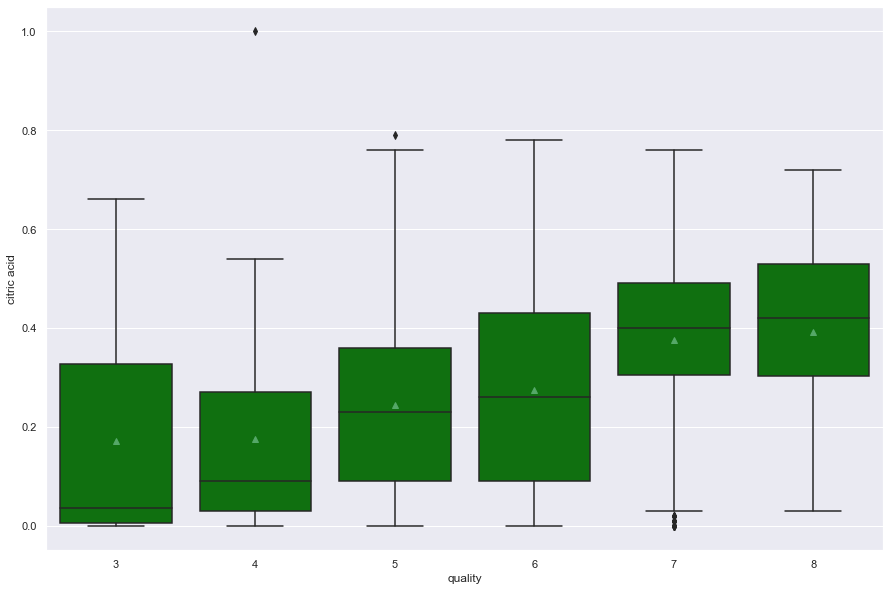

In [13]:
# Citric acid vs quality
sns.boxplot(x=wine['quality'],y=wine['citric acid'],data=wine,color='green',showmeans=True)

# The correlation between citric acid and quality is positive but weak.
# It can be seen that as the wine quality increases the value of citric acid also increases.
# This is evident from the median and mean representations of the plots.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

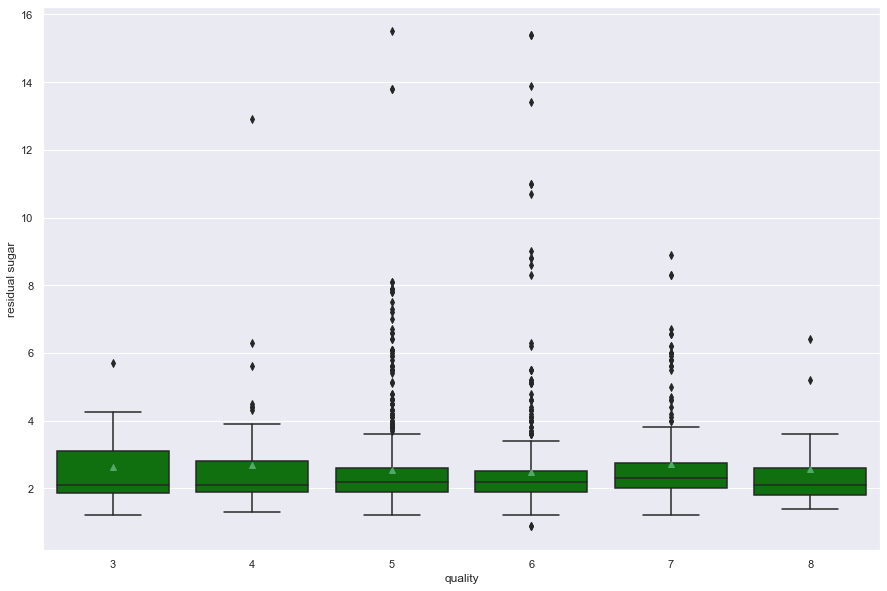

In [14]:
# Residual sugar vs quality
sns.boxplot(x=wine['quality'],y=wine['residual sugar'],data=wine,color='green',showmeans=True)

# From both the heatmap and the boxplot it is evident that residual sugar has negligible impact on quality.
# The mean and median are relatively the same for all classes of quality.
# Shows no correlation with quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

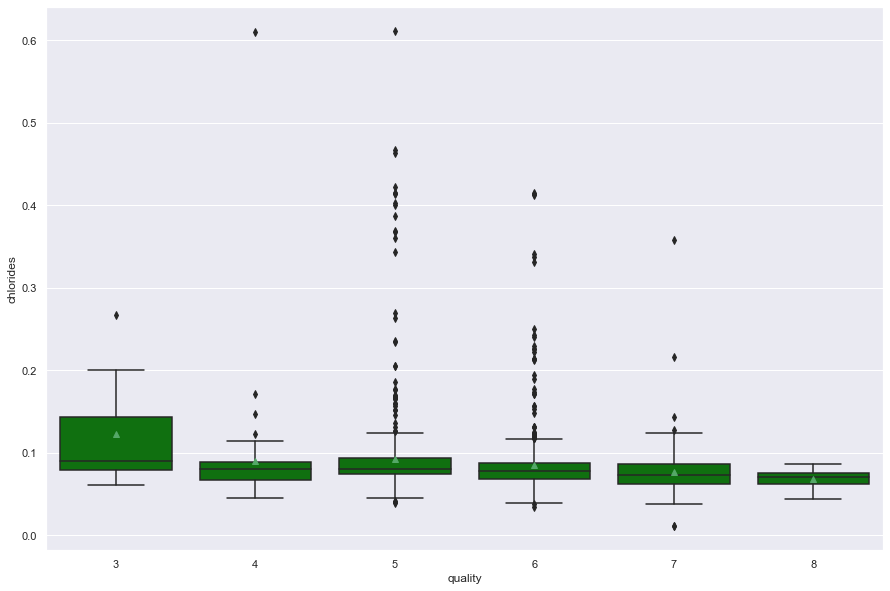

In [16]:
# Chlorides vs quality
sns.boxplot(x=wine['quality'],y=wine['chlorides'],data=wine,color='green',showmeans=True)

# From the heatmap we noted that chlorides have negative correlation with quality
# It appears that as the wine quality increases the chloride value decreases.
# The median value decreases as quality increases.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

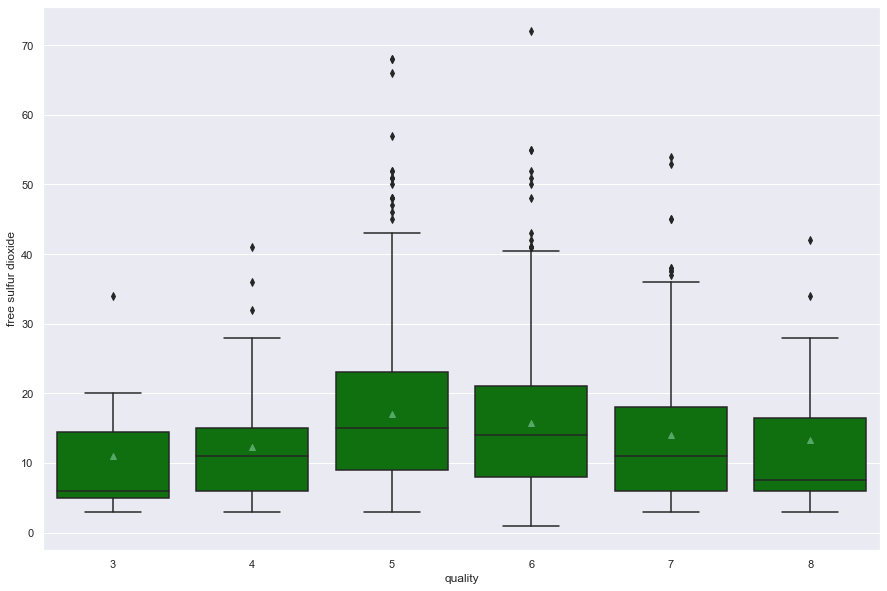

In [17]:
# Free sulfur dioxide vs quality
sns.boxplot(x=wine['quality'],y=wine['free sulfur dioxide'],data=wine,color='green',showmeans=True)

# free sulfur dioxide had a correlation coefficient of -0.013 with quality.This
# means that there is almost no correlation between the variables.
# The plot below shows that the concentration of free SO2 is lower in classes (3,4,7,8).
# Whereas the concentration is higher in classes '5' & '6'.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

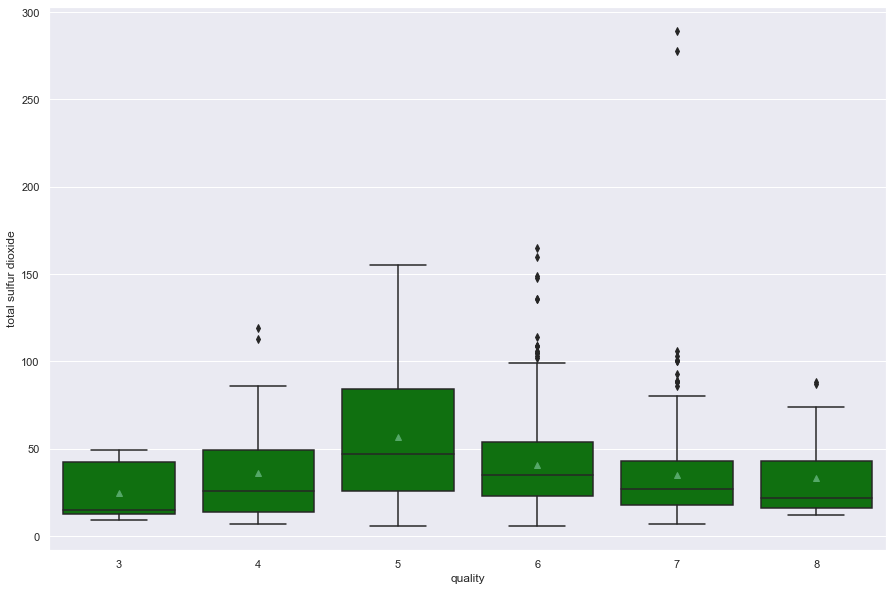

In [18]:
# Total sulfur dioxide vs quality
sns.boxplot(x=wine['quality'],y=wine['total sulfur dioxide'],data=wine,color='green',showmeans=True)

# Shows a similar result to free sulfur dioxide.Can't establish a proper pattern.

<AxesSubplot:xlabel='quality', ylabel='density'>

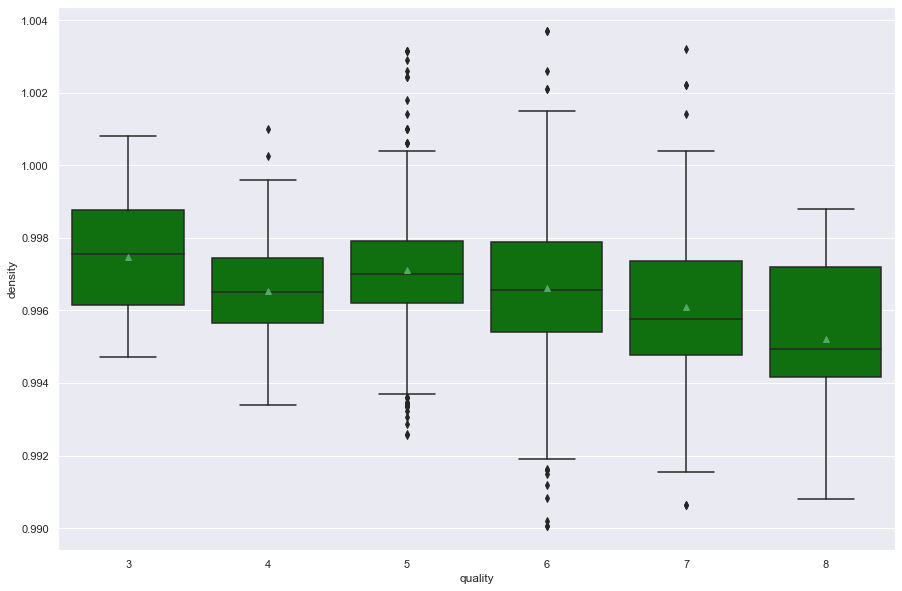

In [19]:
# Density vs quality
sns.boxplot(x=wine['quality'],y=wine['density'],data=wine,color='green',showmeans=True)

# It seems like better quality wines have lower densities.But it is difficult to make this 
# conclusion here as from domain knowledge we know that density and alcohol are correlated.
# Next we can check density and alcohol correlation.

<AxesSubplot:xlabel='alcohol', ylabel='density'>

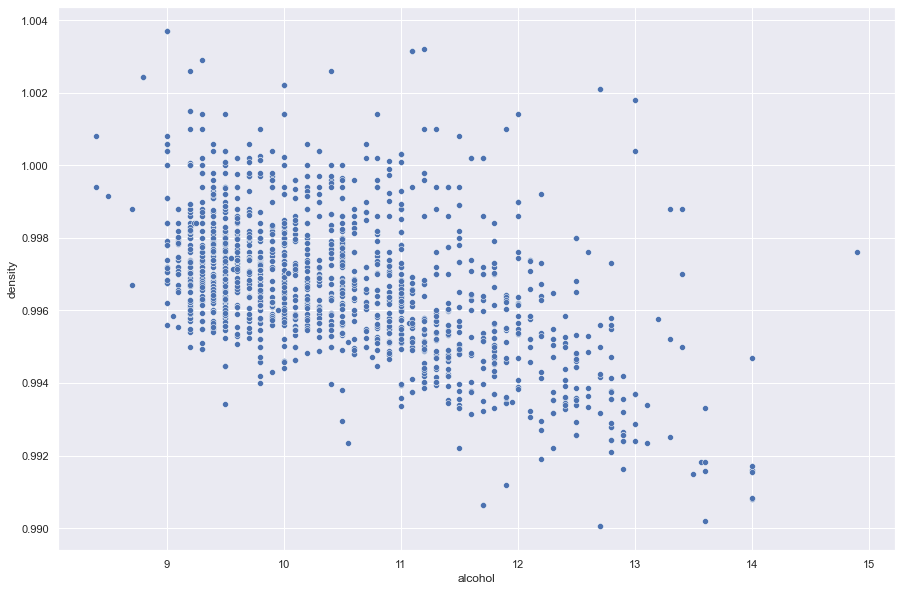

In [20]:
# Scatterplot to show relation between density and alcohol
sns.scatterplot(x=wine['alcohol'],y=wine['density'],data=wine)

# We can observe that as the alcohol percentage increases the density decreases.
# They are negatively correlated.Alcohol is the driving factor as it has the highest correlation with quality.

<AxesSubplot:xlabel='quality', ylabel='pH'>

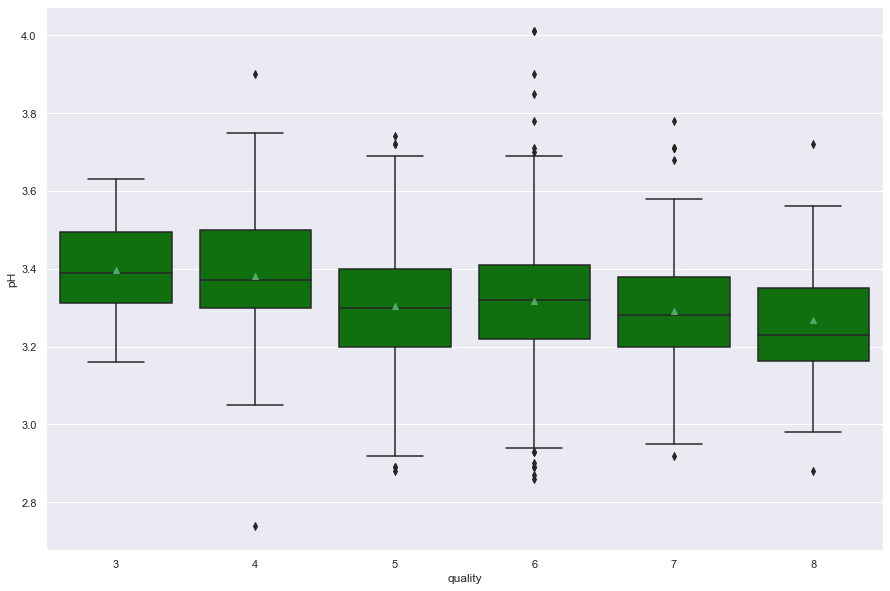

In [22]:
# pH vs quality
sns.boxplot(x=wine['quality'],y=wine['pH'],data=wine,color='green',showmeans=True)

# It seems that better quality wines have lower pH values.Which means they are more
# acidic in nature.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

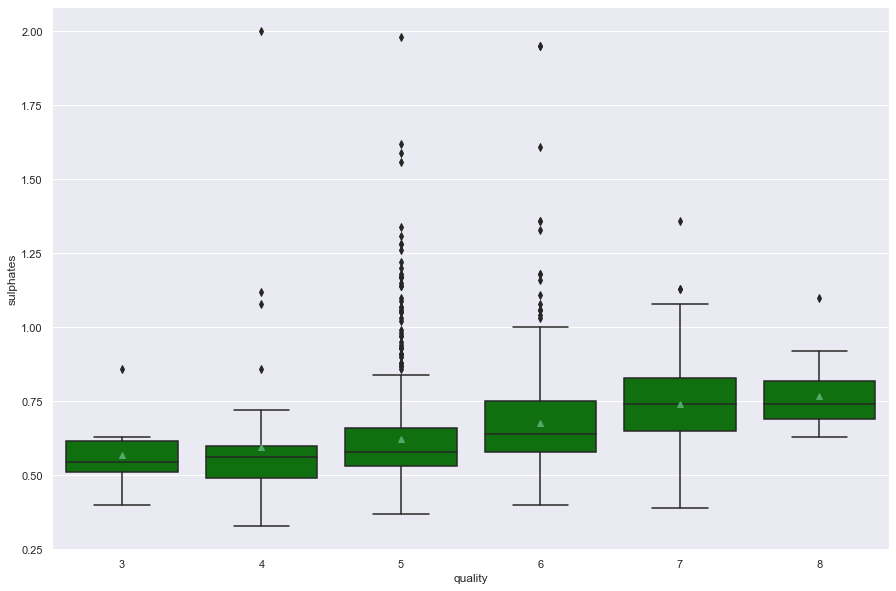

In [23]:
# Sulphates vs quality
sns.boxplot(x=wine['quality'],y=wine['sulphates'],data=wine,color='green',showmeans=True)

# From the heatmap we know that sulphates has a positive correlation(0.25) with quality.
# As the quality of wine increases the sulphate concentration also increases as is evident from the median bars.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

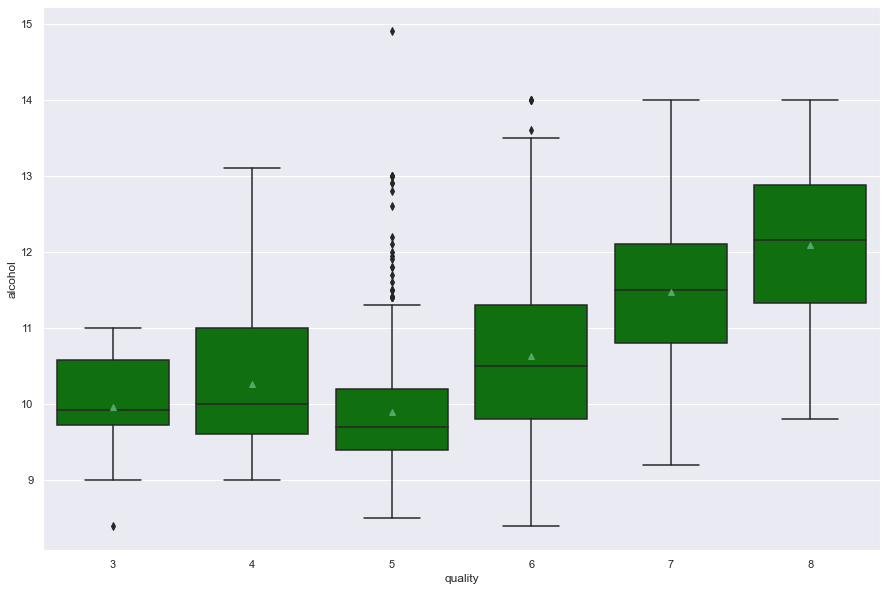

In [24]:
# Alcohol vs quality
sns.boxplot(x=wine['quality'],y=wine['alcohol'],data=wine,color='green',showmeans=True)

# From our heatmap we noted that alcohol is the ONLY feature with the highest positive correlation(0.48).
# The boxplot shows that better quality wines do have higher alcohol percentage.
# But remember that none of the features(including alcohol) have a strong +ve or -ve 
# correlation with quality.
# We cannot say that alcohol alone is the driving factor for better quality wines.

# BiVariate Analysis Summary:-
The features that show correlation(positive or negative) with quality are :
-volatile acidity -sulphates -citric acid -Alcohol

Out of the aforementioned features Alcohol shows the highest correlation(0.48) with quality.

Higher quality wines show higher alcohol percentages.

Also higher quality wines show lower density values.This could be due to higher alcohol percentage.
We made a 'scatterplot' for density and alcohol which showed that higher alcohol values indicate 
lower density values.

Higher quality wines show lesser pH values i.e they are more 'acidic'.

The features that show extremely weak(negligible) or no correlation with quality are:-
- fixed acidity -residual sugar -chlorides -total sulfur dioxide -free sulfur dioxide 

One thing that I've observed is that none of the features are strongly correlated with quality.
Even alcohol for that matter shows only (0.48) correlation coefficient value with quality.
According to the Pearson Coefficient scale we can say that it is a weak correlation.
It isn't even moderate let alone strong.

# MultiVariate Analysis
Here we will try and plot two independent variables against the dependent variable
'quality' using Scatterplots

<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>

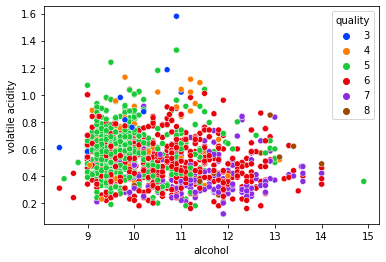

In [14]:
sns.scatterplot(x=wine['alcohol'],y=wine['volatile acidity'],hue=wine['quality'],data=wine,palette='bright')

# In the below scatterplot the different colors represent different qualities of
# wine.The x-axis has alcohol,y-axis has volatile acidity.
# We can observe that better quality wines are mostly clustered on the bottom right corner.
# That is they have higher alcohol concentration and lower volatile acidity.

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

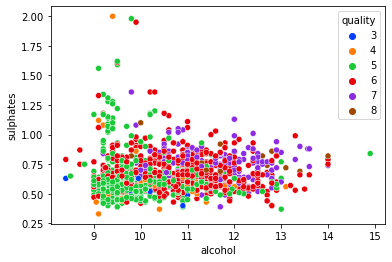

In [15]:
sns.scatterplot(x=wine['alcohol'],y=wine['sulphates'],hue=wine['quality'],data=wine,palette='bright')

# Higher quality wines represented in 'purple' & 'red' have higher sulphate values 
# and greater alcohol concentration compared to lower quality wines.

<AxesSubplot:xlabel='alcohol', ylabel='citric acid'>

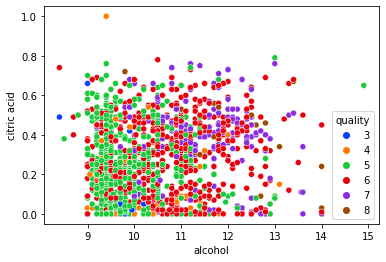

In [16]:
sns.scatterplot(x=wine['alcohol'],y=wine['citric acid'],hue=wine['quality'],data=wine,palette='bright')

# Again better wines have a higher concentration of citric acid.

# Observations from MultiVariate Analysis
For multivariate analysis we took only the independent variables that had a somewhat
decent correaltion with quality.That is we used alcohol(for obvious reasons),citric acid,
sulphates and volatile acidity.From previous analysis we noted that all the other 
remaining features did not have a visible correlation with quality.

It can be observed that citric acid values are higher for higher quality wines.
Also better quality wines have higher alcohol concentration and sulphate values.

# Data Preprocessing

Calculating VIF(Variance Inflation Factor) for Independent Variables to test
for multicollinearity
   

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [19]:
variables = wine[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

# We observe that all VIF values are below '5' except density.
# Just to be on the safe side we will next do feature scaling so that all
# the predictor features are in the same range.

,VIF,features
0,1.710538e+06,const
1,7.767512e+00,fixed acidity
2,1.789390e+00,volatile acidity
3,3.128022e+00,citric acid
4,1.702588e+00,residual sugar
5,1.481932e+00,chlorides
6,1.963019e+00,free sulfur dioxide
7,2.186813e+00,total sulfur dioxide
8,6.343760e+00,density
9,3.329732e+00,pH


# Model Creation

In [ ]:
# The first model we will run is 'Logistic Regression'.
# There are some criteria that we will have to fulfill before we build this model.
# Criteria to be fulfilled:
  # 1) Check for Multicollinearity 2)Create a binary output variable
  # 3) Scale the features
# Feature scaling is required since it is a gradient based algorithm.

# NOTE: WE HAVE TESTED FOR MULTICOLLINEARITY USING 'VIF' METHOD ABOVE.

# First Model-Logistic Regression

Extracting Variables

In [25]:
# We have stored all independent variables in 'X' by dropping 'quality'.
X = wine.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [23]:
# Before we go ahead with train test split lets convert our output variable quality
# into a binary output(i.e '0' or '1')

# Here we have used a lambda function to represent values below (7) as '0' and >=(7) as '1.

Y = wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)



0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train Test Split

In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

Feature Scaling

In [77]:
# Scaling the independent variables

standar_scaler=StandardScaler()  #instantiating the method 'StandardScaler'
X_train= standar_scaler.fit_transform(X_train)  #fit generates parameters 
                                                #transform applies & transforms
X_test=standar_scaler.transform(X_test)    
    

Fitting the model on training Dataset

In [78]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

Predicting Test Dataset

In [79]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [80]:
Y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Model Evaluation

Confusion Matrix

In [81]:
conf_matrix=confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[396,  12],
       [ 55,  17]], dtype=int64)

Calculating Accuracy,Precision & Recall

In [82]:
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.8604166666666667


In [83]:
print("Precision:",metrics.precision_score(Y_test,Y_pred))

Precision: 0.5862068965517241


In [84]:
print("Recall:",metrics.recall_score(Y_test,Y_pred))

Recall: 0.2361111111111111


In [58]:
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       408
           1       0.59      0.24      0.34        72

    accuracy                           0.86       480
   macro avg       0.73      0.60      0.63       480
weighted avg       0.83      0.86      0.83       480



NOW WE WILL AGAIN RUN A LOGISTIC REGRESSION MODEL WITH A DIFFERENT SPLIT SIZE TO SEE
IF THE ACCURACY CHANGES.

In [61]:
X1 = wine.drop('quality',axis=1)

In [64]:
Y1 = wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y1)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [65]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [66]:
# Scaling the independent variables

standar_scaler=StandardScaler()  #instantiating the method 'StandardScaler'
X1_train= standar_scaler.fit_transform(X1_train)  #fit generates parameters 
                                                #transform applies & transforms
X1_test=standar_scaler.transform(X1_test)    
    

In [67]:
log_reg=LogisticRegression()
log_reg.fit(X1_train,Y1_train)

LogisticRegression()

In [68]:
Y1_pred=log_reg.predict(X1_test)
Y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [69]:
conf_matrix=confusion_matrix(Y1_test,Y1_pred)
conf_matrix

array([[264,   9],
       [ 34,  13]], dtype=int64)

print("Accuracy:",metrics.accuracy_score(Y1_test,Y1_pred))

In [71]:
print("Precision:",metrics.precision_score(Y1_test,Y1_pred))

Precision: 0.5909090909090909


In [72]:
print("Recall:",metrics.recall_score(Y1_test,Y1_pred))

Recall: 0.2765957446808511


In [73]:
print(metrics.classification_report(Y1_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



OBSERVATIONS REGARDING LOGISTIC REGRESSION

In [ ]:
# After running two logistic regression models on the dataset I found that:
# The accuracy in both the models is almost equal.The first model gave us an 
# accuracy of 86% while the second model gave an accuracy of 87%.
# So we can say that changing the split size and random state didn't make 
# much of a difference in the predicted accuracy.

# Second Model- Decision Tree

Separating x and y

In [89]:
x = wine.drop('quality',axis=1).values  # storing independent variables in x
y = wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

Split Data Into Train Test Data 

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Decision Tree Model 

In [109]:
model_dt=DecisionTreeClassifier()

In [91]:
# Creating a Decision Tree with Depth '4' based on CART(GINI)
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)  #instantiating model
model_dt_4.fit(x_train,y_train)

y_pred_4=model_dt_4.predict(x_test)
accuracy_score_4=accuracy_score(y_test,y_pred_4)
print('Accuracy score for Decison Tree with depth 4 is:',accuracy_score_4)

Accuracy score for Decison Tree with depth 4 is: 0.9


In [96]:
# Creating a Decision Tree with Depth '6' 
model_dt_6=DecisionTreeClassifier(random_state=8,max_depth=6)  #instantiating model
model_dt_6.fit(x_train,y_train)

y_pred_6=model_dt_6.predict(x_test)
accuracy_score_6=accuracy_score(y_test,y_pred_6)
print('Accuracy score for Decison Tree with depth 6 is:',accuracy_score_6)

Accuracy score for Decison Tree with depth 6 is: 0.903125


In [97]:
# Creating a Decision Tree with Depth '8' 
model_dt_8=DecisionTreeClassifier(random_state=42,max_depth=8)  #instantiating model
model_dt_8.fit(x_train,y_train)

y_pred_8=model_dt_8.predict(x_test)
accuracy_score_8=accuracy_score(y_test,y_pred_8)
print('Accuracy score for Decison Tree with depth 8 is:',accuracy_score_8)

Accuracy score for Decison Tree with depth 8 is: 0.8875


# Decision Tree Creation with Entropy(c4.5)

In [98]:
model_dt_ent= DecisionTreeClassifier(max_depth=4,criterion='entropy')
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)

accuracy_score_ent=accuracy_score(y_test,y_pred_ent)
print('Accuracy score for Decison Tree with depth 4 is:',accuracy_score_ent)


Accuracy score for Decison Tree with depth 4 is: 0.890625


# Confusion Matrix

In [99]:
print(confusion_matrix(y_test,y_pred_6))

[[267  12]
 [ 19  22]]


In [100]:
print(classification_report(y_test,y_pred_6))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       279
           1       0.65      0.54      0.59        41

    accuracy                           0.90       320
   macro avg       0.79      0.75      0.77       320
weighted avg       0.90      0.90      0.90       320



# Area Under The Curve

In [103]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_6)
roc_auc_dt=auc(fpr_dt,tpr_dt)
roc_auc_dt

# Area Under the curve for Decision Tree with Depth '6' is 75%.

0.7467873065827434

# Hyperparameter Tuning On Decision Tree Model

In [110]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
# Creating key value pairs for the hyperparameters
param_dist={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,None] }

In [118]:
grid=GridSearchCV(model_dt,param_grid=param_dist,cv=5,n_jobs=-1) 

In [119]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [121]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [122]:
grid.best_score_

0.8811519607843138

OBSERVATIONS BASED ON DIFFERENT DECISION TREE MODELS

In [124]:
# The first few decision trees that we created were of different depths with different
# random states.Decision trees with depth '4' and '8' gave us accuracies of '90 %'.

# However,when we increased the depth to '8' the accuracy decreased to '88 %'.

# The final Decision Tree we created with the help of Hyperparameter Tuning(GridSearchCV)
# gave us a very interesting result.It gave us a best_score_ of 88%.
# This is less than what we got when we created Decision Trees with depth '4' and '6'.

# Third Model- Random Forest Classifier

In [6]:
# Separating The Variable X2 & Y2
X2=wine.drop('quality',axis=1)
Y2=wine['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [7]:
# Train Test Split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=2)

In [12]:
# Model Instantiation
rfc= RandomForestClassifier()

In [13]:
rfc.fit(X2_train,Y2_train)

RandomForestClassifier()

In [14]:
Y2_pred=rfc.predict(X2_test)

In [15]:
print('Accuracy:',accuracy_score(Y2_test,Y2_pred))

Accuracy: 0.915625


# CREATING RANDOM FOREST USING HYPERPARAMETER TUNING

In [17]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(rfc, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X2_train, Y2_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}


In [19]:
#Finally the best parameters are specified

rfc.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  bootstrap = False,
                  max_depth = 4)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='log2')

In [20]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, max_depth=4, max_features='log2')>

In [21]:
rfc.fit(X2_train,Y2_train)
Y_pred_1=rfc.predict(X2_test)

In [22]:
accuracy_rfc=accuracy_score(Y2_test,Y_pred_1)
accuracy_rfc

0.89375

In [29]:
print(classification_report(Y2_test,Y2_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       279
           1       0.71      0.59      0.64        41

    accuracy                           0.92       320
   macro avg       0.82      0.77      0.80       320
weighted avg       0.91      0.92      0.91       320



In [28]:
predictions_prob = rfc.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = roc_curve(Y2_test,predictions_prob)
auc(fpr,tpr)

# Area Under the Curve is 90 %.

0.900778040038465

OBSERVATIONS BASED ON RANDOM FOREST MODELS

In [ ]:
# We first created a RandomForest Model using default approach.
# With this first model we got an accuracy of '92'%.
# After that we created a Random Forest Model using Hyperparameter Tuning.
# The tuned model gave us an accuracy of '89'%.
# This is similar to what we observed when we created Tuned Decision Trees.

# FINAL CONCLUSIONS

Based on all the different models we used on our wine quality dataset,the best
result was given by Random Forest Classifier.

It gave an accuracy of '92'% which is higher than both Logistic Regression & Decision Tree models.
Also the Area Under The Curve(auc) was 90% for Random Forest Model.

After analysing and observing the results of different models, we can say that 
for this dataset Random Forest Classifier works best.

<!-- # We ran three different models on our wine quality dataset.

# Out of all the three models(Logistic Reg,Decision Tree,Random Forest) that we ran
# on our dataset the best accuracy and Area Under Curve(AUC) was given by RANDOM FOREST CLASSIFIER

# Based on our observations of all models we can conclude that Random Forest gave us the best results. -->